# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import random
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

   # city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [115]:
#api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()

print(f"downloading weather info for each selected city")

#creating holders for each of the fields to be received from the api call

cloudiness_array = []
country_array = []
date_array = []
humidity_array = []
lat_array = []
lng_array = []
max_temp_array = []
wind_speed_array = []
city_name_array = []

#create a counter for the received records starting with first record
city_ctr = 1

# Create a loop to store each record in the allocated arrays. This process could have been done in one step
# but to have clean code has been separated in getting the response first and then add it to the array.
for city in cities[:570]:
     response = requests.get(query_url + city).json() 
  
     try:         
        Cloudiness = response["clouds"]["all"]  
        Country = response["sys"]["country"]
        Date = response["dt"]        
        Humidity = response["main"]["humidity"]
        Lat = response["coord"]["lat"]
        Lng = response["coord"]["lon"]
        Temp_Max = response["main"]["temp_max"]
        Wind_Speed = response["wind"]["speed"]
        
        cloudiness_array.append(Cloudiness)
        country_array.append(Country)
        date_array.append(Date)
        humidity_array.append(Humidity)
        lat_array.append(Lat)
        lng_array.append(Lng)
        max_temp_array.append(Temp_Max)        
        wind_speed_array.append(Wind_Speed)
        city_name_array.append(city)
    
        #printing incoming records as they are downloaded
        print(f"Downloading Record ....{city_ctr} .... Country: {Country} ....City: {city}")
                                 
        # Increase counter by one 
        city_ctr += 1
        
        # create intervals of 1.2 between records to slow down the process from the api and avoid locking issues 
        time.sleep(0.5)
        
     #if no record is found then print an error message and continue    
     except:
         print("record not found")
        # continue
        

downloading weather info for each selected city
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found


record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found


record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found


record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found
record not found


record not found
record not found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [142]:
#create dictionary
city_data_dictionary1 = {
    "City": city_name_array,
    "Cloudiness":cloudiness_array, 
    "Country":country_array,
    "Date":date_array, 
    "Humidity": humidity_array,
    "Lat":lat_array, 
    "Lng":lng_array, 
    "Max Temp": max_temp_array,
    "Wind Speed":wind_speed_array
}

#create data frame from dictionary
city_data1 = pd.DataFrame(city_data_dictionary1)
city_data1.count()

#store data in output csv file
city_data1.to_csv("../output_data/city_data1.csv")

# Display data frame head 
city_data1.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
510,birao,49,CF,1587414111,29,10.28,22.79,84.27,2.66
511,touros,40,BR,1587414112,83,-5.20,-35.46,80.60,11.41
512,hambantota,69,LK,1587414042,80,6.12,81.12,81.82,10.65
513,sandwick,0,GB,1587414116,81,60.00,-1.25,46.40,9.17
514,coahuayana,20,MX,1587414116,55,18.73,-103.68,86.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

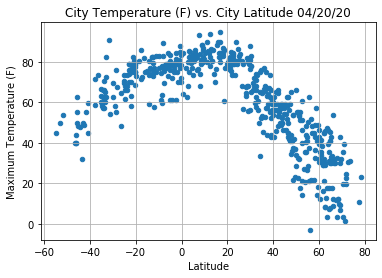

In [117]:
plt.scatter(city_data1["Lat"], city_data1["Max Temp"], marker="o", s=20)

city_date = time.gmtime(city_data1["Date"][0])

string_date = time.strftime("%x",city_date)

plt.title(f"City Temperature (F) vs. City Latitude {string_date}")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)
plt.savefig("../output_data/Temperature_vs_Latitude.png")
plt.show()

# Notes: this plot is comparing cities max temperature with their corresponding latitude.
# We can observe clearly that temps increase in general when latitude is closer to zero (equator) and tend to 
# go down in the way cities are located farer from the equatorial line. We also see a deeper decreasing on the right
# side of the plot that corresponds to the northern hemisphere because it is getting out of the winter still.

#### Latitude vs. Humidity Plot

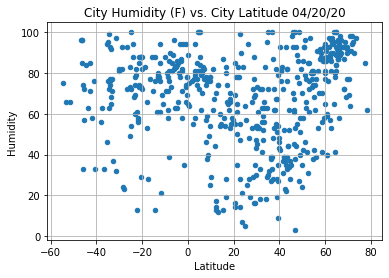

In [118]:
plt.scatter(city_data1["Lat"], city_data1["Humidity"], marker="o", s=20)

city_date = time.gmtime(city_data1["Date"][0])

string_date = time.strftime("%x",city_date)

plt.title(f"City Humidity (F) vs. City Latitude {string_date}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_humidity.png")
plt.show()

# Notes: this plot is comparing cities humidity with their corresponding latitude.
# There is not a clear indication showing high humidity and variation in latitude


#### Latitude vs. Cloudiness Plot

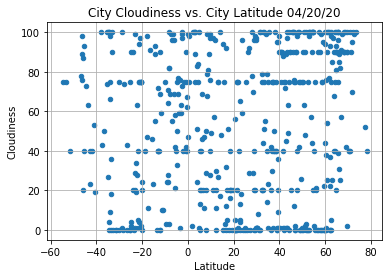

In [119]:
plt.scatter(city_data1["Lat"], city_data1["Cloudiness"], marker="o", s=20)

city_date = time.gmtime(city_data1["Date"][0])

string_date = time.strftime("%x",city_date)


plt.title(f"City Cloudiness vs. City Latitude {string_date}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_Cloudiness.png")
plt.show()

# Notes: this plot is comparing cities cloudiness with their corresponding latitude.
# No correlation between these two variables is observed in the plot

#### Latitude vs. Wind Speed Plot

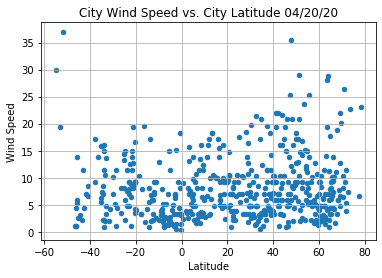

In [120]:
plt.scatter(city_data1["Lat"], city_data1["Wind Speed"], marker="o", s=20)

city_date = time.gmtime(city_data1["Date"][0])

string_date = time.strftime("%x",city_date)

plt.title(f"City Wind Speed vs. City Latitude {string_date}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_wind_speed.png")
plt.show()

# Notes: this plot is comparing cities wind speed with their corresponding latitude.
# No clear indication of correlation between latitude and wind speed despite a little
# increment of wind speed closer to the poles

## Linear Regression

In [153]:
#create data frame from dictionary
lin_reg_df = pd.DataFrame(city_data_dictionary1)
lin_reg_df.count()

north= (lin_reg_df.loc[lin_reg_df["Lat"] >= 0])
north.reset_index(inplace=True)

south = (lin_reg_df.loc[lin_reg_df["Lat"] < 0])
south.reset_index(inplace=True)

def generic_linreg_weather_func(x_val,y_val,x_label,y_label, y_loc):
    
     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

     regress_values = x_val * slope + intercept
     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     plt.scatter(x_val, y_val)
     plt.plot(x_val, regress_values,"r-")
     plt.xlabel(x_label)
     plt.ylabel(y_label)
     print(f"The r-squared is: {rvalue**2}")
     plt.grid(True)
     plt.annotate(line_eq,y_loc,fontsize=15,color="red")
     plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7684507794019243


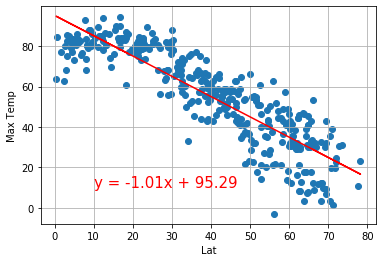

<Figure size 432x288 with 0 Axes>

In [157]:
y_loc = (10,10)
x_label = "Lat"
y_label = "Max Temp"
generic_linreg_weather_func(north[x_label],north[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/north_lat_vs_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5073892836623842


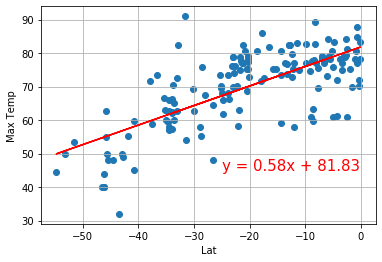

<Figure size 432x288 with 0 Axes>

In [146]:
y_loc = (-25, 45)
x_label = "Lat"
y_label = "Max Temp"
generic_linreg_weather_func(south[x_label],south[y_label],x_label,y_label, y_loc)
plt.savefig("../output_data/south_latitude_vs_Max_Temp.png")

# Notes: In the northern hemisphere we observe a defined linear regression and firm correlation showing decreasing max
# temps when the distance increases from the equator towards the north pole. The same can be observed in the southern 
# hemisphere where temps drop for cities located farer from the equatorial line towards the south pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09043044348497348


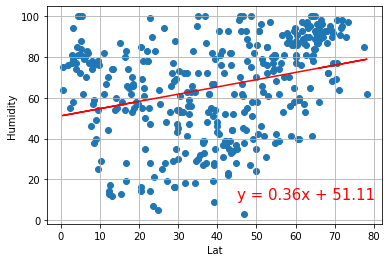

<Figure size 432x288 with 0 Axes>

In [156]:
y_loc = (45,10)
x_label = "Lat"
y_label = "Humidity"
generic_linreg_weather_func(north[x_label],north[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/north_latitude_vs_Humidity.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009932844760222994


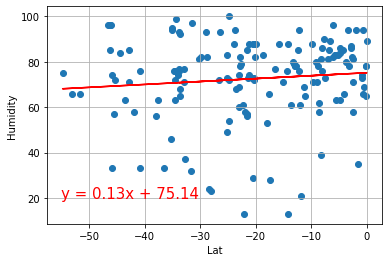

<Figure size 432x288 with 0 Axes>

In [148]:
y_loc = (-55,20)
x_label = "Lat"
y_label = "Humidity"
generic_linreg_weather_func(south[x_label],south[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/south_latitude_vs_Humidity.png")

# Notes: Not a high probability of correlation between latitude and humidity in the northern 
# or southern hemispheres is being observed in these two plots


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.035992574874663126


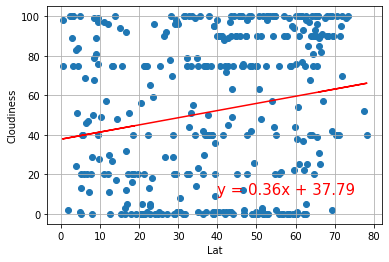

<Figure size 432x288 with 0 Axes>

In [149]:
y_loc = (40,10)
x_label = "Lat"
y_label = "Cloudiness"
generic_linreg_weather_func(north[x_label],north[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/north_latitude_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0027546233476931827


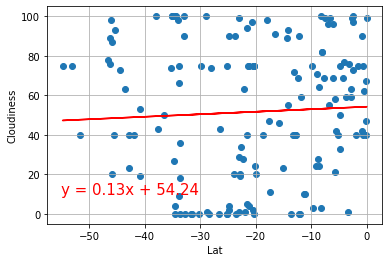

<Figure size 432x288 with 0 Axes>

In [150]:
y_loc = (-55,10)
x_label = "Lat"
y_label = "Cloudiness"
generic_linreg_weather_func(south[x_label],south[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/south_latitude_vs_cloudiness.png")

# Notes: As with the previous plots, we can observe a very low probability of correlation
# between latitude and cloudiness in the northern or southern hemispheres. linear regression is not well defined.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008306960494918771


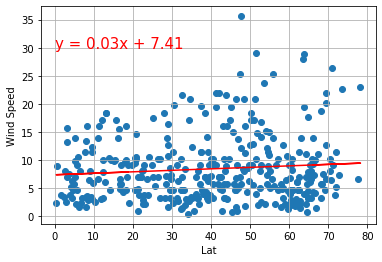

<Figure size 432x288 with 0 Axes>

In [151]:
y_loc = (0,30)
x_label = "Lat"
y_label = "Wind Speed"
generic_linreg_weather_func(north[x_label],north[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/north_latitude_vs_wind_speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10424889664817545


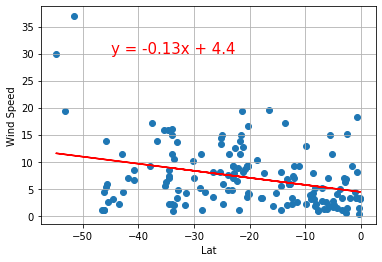

<Figure size 432x288 with 0 Axes>

In [152]:
y_loc = (-45,30)
x_label = "Lat"
y_label = "Wind Speed"
generic_linreg_weather_func(south[x_label],south[y_label], x_label, y_label, y_loc)
plt.savefig("../output_data/south_latitude_vs_wind_speed.png")

# Notes: Not a high probability of correlation between latitude and Wind speed is observed
# in both hemispheres but what we can see is some weak increases in wind when closer to the poles.